In [ ]:
! pip install wandb

# **Import Required Libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  Conv2D,MaxPool2D,Flatten,Dense,Dropout

import wandb
from wandb.keras import WandbCallback

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
wandb.init(project="FaceMask Detection")

# **DataSet**

In [ ]:
Train_dataset_path = "/content/drive/MyDrive/Datasets/Face Mask Dataset/Train"

width = height = 224

idg = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 15,
    zoom_range = 0.1,
    brightness_range =  (0.9, 1.1), 
    validation_split = 0.2
)

train_data = idg.flow_from_directory(
    Train_dataset_path,
    target_size = (width , height),
    class_mode = 'categorical',
    subset = 'training'
)

Val_dataset_path = "/content/drive/MyDrive/Datasets/Face Mask Dataset/Validation"

val_data = idg.flow_from_directory(
    Val_dataset_path,
    target_size = (width , height),
    class_mode = 'categorical',
    subset = 'validation'
)

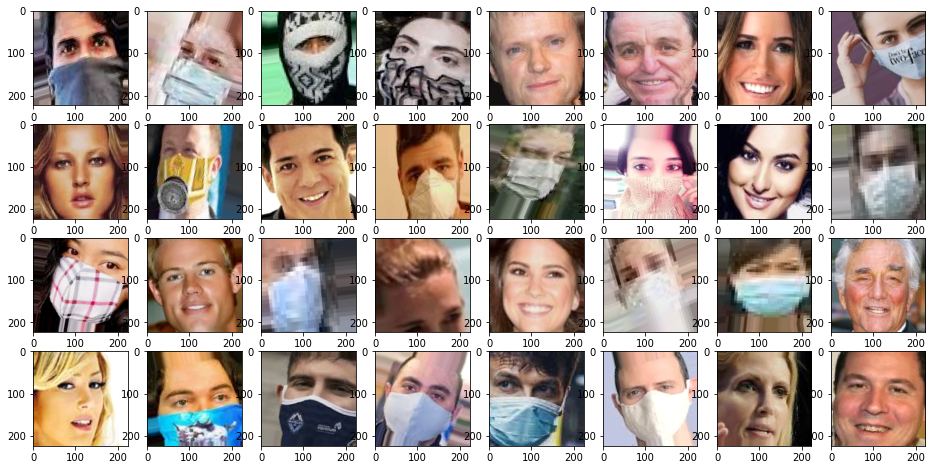

In [79]:
some_images = next(train_data)

X = some_images[0]
Y = some_images[1]

plt.figure(figsize=(16, 8))

for i in range(32):
  plt.subplot(4, 8, i+1)
  plt.imshow(X[i])

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights = 'imagenet',
    input_shape = (width, height, 3),
)

In [81]:
for layer in base_model.layers:
  layer.trainable = False

In [82]:
model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dropout(0.2), 
    Dense(2, activation='softmax')                    
])

In [83]:
config = wandb.config
config.learning_rate = 0.001

In [84]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

In [ ]:
model.summary()

# **Train**

In [ ]:
model.fit(train_data, validation_data = val_data , epochs=10, callbacks=[WandbCallback()])

# **Test**

In [ ]:
test_dataset_path = '/content/drive/MyDrive/Datasets/Face Mask Dataset/Test'
width = height = 224
batch_size = 32

idg = ImageDataGenerator(
    rescale = 1./255,
)

test_data = idg.flow_from_directory(
    test_dataset_path,
    target_size = (width, height),
    class_mode = 'categorical',
    batch_size = batch_size,
)

In [ ]:
model.evaluate(test_data)

In [ ]:
model.save("/content/drive/MyDrive/Datasets/Face Mask Dataset/Face Mask Dataset.h5")